In [3]:
import pandas as pd

df = pd.read_csv("../data/final.csv", encoding="utf-8")
df

대분류  소분류    구    동    개수         계수
0     건강   약국  강남구  개포동  41.0  41.000000
1     건강   약국  강남구  논현동  87.0  87.000000
2     건강   약국  강남구  대치동  63.0  63.000000
3     건강   약국  강남구  도곡동  36.0  36.000000
4     건강   약국  강남구  삼성동  38.0  38.000000
...   ..  ...  ...  ...   ...        ...
7387  편의  편의점  중랑구  면목동  78.0  12.966413
7388  편의  편의점  중랑구   묵동  22.0  11.593187
7389  편의  편의점  중랑구  상봉동  32.0  20.907601
7390  편의  편의점  중랑구  신내동  22.0   6.230866
7391  편의  편의점  중랑구  중화동  28.0  16.865311

[7392 rows x 6 columns]

In [113]:
result_df = df.pivot_table(
    index=["구", "동"], columns="소분류", values="계수"
).reset_index()
result_df.columns.name = None
result_df = result_df.fillna(0)
result_df

구    동       PC방        경찰    공공체육시설  공연장    공원       다이소      대형마트  \
0    강남구  개포동  0.000055  0.000011  0.000033  1.0  14.0  0.000000  0.000000   
1    강남구  논현동  0.000319  0.000049  0.000025  4.0   9.0  0.368017  0.000000   
2    강남구  대치동  0.000149  0.000012  0.000037  4.0  12.0  0.527365  0.000000   
3    강남구  도곡동  0.000038  0.000000  0.000038  1.0   9.0  0.979741  0.000000   
4    강남구  삼성동  0.000093  0.000047  0.000023  5.0   9.0  0.626858  0.313429   
..   ...  ...       ...       ...       ...  ...   ...       ...       ...   
450  중랑구  면목동  0.001031  0.000030  0.000083  2.0  19.0  0.000000  0.332472   
451  중랑구   묵동  0.000899  0.000020  0.000098  0.0   8.0  0.000000  0.000000   
452  중랑구  상봉동  0.001192  0.000000  0.000000  7.0   4.0  0.000000  1.306725   
453  중랑구  신내동  0.000409  0.000018  0.000053  0.0  11.0  0.000000  0.566442   
454  중랑구  중화동  0.001151  0.000024  0.000000  0.0   6.0  0.000000  0.000000   

          도서관  ...   은행      주민센터  지하철역        카페     코인노래방        편의점     하천  \
0    0.000011  ...  0.0  0.000055   3.0  0.000653  0.000166   5.339912   3.81   
1    0.000025  ...  0.0  0.000049   9.0  0.005000  0.000784  35.697653   0.00   
2    0.000037  ...  0.0  0.000037   9.0  0.002690  0.000274  21.621981  12.59   
3    0.000019  ...  0.0  0.000038   5.0  0.001283  0.000189  14.206249   4.39   
4    0.000023  ...  0.0  0.000047   4.0  0.003784  0.000374  20.059443  12.67   
..        ...  ...  ...       ...   ...       ...       ...        ...    ...   
450  0.000008  ...  0.0  0.000046   3.0  0.000872  0.000865  12.966413   9.33   
451  0.000020  ...  0.0  0.000020   1.0  0.000742  0.000723  11.593187  11.06   
452  0.000023  ...  0.0  0.000046   3.0  0.001329  0.001559  20.907601   0.68   
453  0.000000  ...  0.0  0.000036   2.0  0.000872  0.000231   6.230866   1.03   
454  0.000024  ...  0.0  0.000048   2.0  0.000695  0.001031  16.865311  14.13   

        한강        한방       헬스장  
0     1.83  0.000321  0.000199  
1     0.12  0.001250  0.002182  
2    40.94  0.000784  0.000872  
3     0.00  0.000604  0.000660  
4    44.60  0.000818  0.001215  
..     ...       ...       ...  
450  20.48  0.000319  0.000243  
451  38.25  0.000293  0.000195  
452   5.89  0.000229  0.000435  
453   0.00  0.000267  0.000214  
454  41.49  0.000336  0.000192  

[455 rows x 32 columns]

In [114]:
import pandas as pd

pop_df = pd.read_csv("data/population.csv", encoding="utf-8")
area_df = pd.read_csv("data/area.csv", encoding="utf-8")
pop_df = pop_df[["시도명", "시군구명", "읍면동명", "계"]]
pop_df = pop_df.loc[pop_df["시도명"] == "서울특별시"]
pop_df.sort_values(by="계", ascending=False)
sub = pop_df.loc[pop_df["계"] < 200].sort_values(by="계", ascending=False)
sub = sub["읍면동명"].to_list()
result_df = result_df[~result_df["동"].isin(sub)]
result_df

구    동       PC방        경찰    공공체육시설  공연장    공원       다이소      대형마트  \
0    강남구  개포동  0.000055  0.000011  0.000033  1.0  14.0  0.000000  0.000000   
1    강남구  논현동  0.000319  0.000049  0.000025  4.0   9.0  0.368017  0.000000   
2    강남구  대치동  0.000149  0.000012  0.000037  4.0  12.0  0.527365  0.000000   
3    강남구  도곡동  0.000038  0.000000  0.000038  1.0   9.0  0.979741  0.000000   
4    강남구  삼성동  0.000093  0.000047  0.000023  5.0   9.0  0.626858  0.313429   
..   ...  ...       ...       ...       ...  ...   ...       ...       ...   
450  중랑구  면목동  0.001031  0.000030  0.000083  2.0  19.0  0.000000  0.332472   
451  중랑구   묵동  0.000899  0.000020  0.000098  0.0   8.0  0.000000  0.000000   
452  중랑구  상봉동  0.001192  0.000000  0.000000  7.0   4.0  0.000000  1.306725   
453  중랑구  신내동  0.000409  0.000018  0.000053  0.0  11.0  0.000000  0.566442   
454  중랑구  중화동  0.001151  0.000024  0.000000  0.0   6.0  0.000000  0.000000   

          도서관  ...   은행      주민센터  지하철역        카페     코인노래방        편의점     하천  \
0    0.000011  ...  0.0  0.000055   3.0  0.000653  0.000166   5.339912   3.81   
1    0.000025  ...  0.0  0.000049   9.0  0.005000  0.000784  35.697653   0.00   
2    0.000037  ...  0.0  0.000037   9.0  0.002690  0.000274  21.621981  12.59   
3    0.000019  ...  0.0  0.000038   5.0  0.001283  0.000189  14.206249   4.39   
4    0.000023  ...  0.0  0.000047   4.0  0.003784  0.000374  20.059443  12.67   
..        ...  ...  ...       ...   ...       ...       ...        ...    ...   
450  0.000008  ...  0.0  0.000046   3.0  0.000872  0.000865  12.966413   9.33   
451  0.000020  ...  0.0  0.000020   1.0  0.000742  0.000723  11.593187  11.06   
452  0.000023  ...  0.0  0.000046   3.0  0.001329  0.001559  20.907601   0.68   
453  0.000000  ...  0.0  0.000036   2.0  0.000872  0.000231   6.230866   1.03   
454  0.000024  ...  0.0  0.000048   2.0  0.000695  0.001031  16.865311  14.13   

        한강        한방       헬스장  
0     1.83  0.000321  0.000199  
1     0.12  0.001250  0.002182  
2    40.94  0.000784  0.000872  
3     0.00  0.000604  0.000660  
4    44.60  0.000818  0.001215  
..     ...       ...       ...  
450  20.48  0.000319  0.000243  
451  38.25  0.000293  0.000195  
452   5.89  0.000229  0.000435  
453   0.00  0.000267  0.000214  
454  41.49  0.000336  0.000192  

[391 rows x 32 columns]

In [116]:
import numpy as np

normalized_df = result_df.copy()
for col in result_df.columns:
    if col not in ["구", "동"]:
        ranks = result_df[col].rank(method="average")
        normalized_df[col] = (ranks - 1) / (len(result_df[col]) - 1)


normalized_df.to_csv("data/dong_data.csv", encoding="utf-8", index=None)

In [117]:
normalized_df.columns

Index(['구', '동', 'PC방', '경찰', '공공체육시설', '공연장', '공원', '다이소', '대형마트', '도서관',
       '따릉이대여소', '문화공간', '반찬가게', '백화점', '버스정류장', '산지', '셀프빨래방', '소방', '시장',
       '약국', '양방', '영화관', '은행', '주민센터', '지하철역', '카페', '코인노래방', '편의점', '하천',
       '한강', '한방', '헬스장'],
      dtype='object')

구: 광진구, 동: 구의동, distance: 0.6556
구: 성동구, 동: 성수동2가, distance: 0.7475
구: 광진구, 동: 중곡동, distance: 0.8022
구: 금천구, 동: 독산동, distance: 0.8208
구: 중랑구, 동: 면목동, distance: 0.8314


/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) JetBrains Mono.
  plt.tight_layout()
/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) JetBrains Mono.
  plt.tight_layout()
/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 52272 (\N{HANGUL SYLLABLE CAL}) missing from font(s) JetBrains Mono.
  plt.tight_layout()
/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) JetBrains Mono.
  plt.tight_layout()
/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) JetBrains Mono.
  plt.tight_layout()
/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from font(s) JetBrains Mono.
  plt.tight_layout()
/tmp/ipykernel_4381/3857812700.py:107: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s

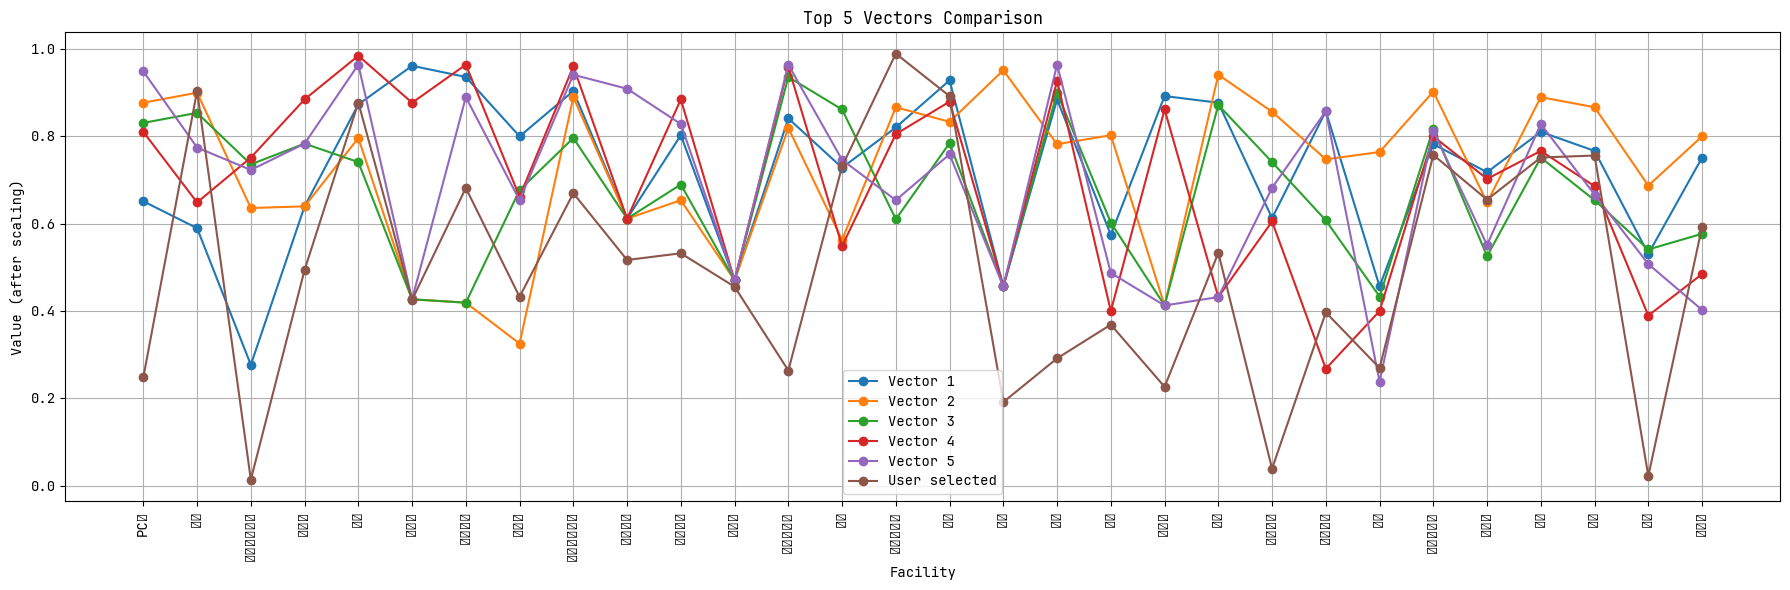

In [163]:
import pandas as pd
import numpy as np

# 시설 컬럼만 선택
facility_columns = [
    "PC방",
    "경찰",
    "공공체육시설",
    "공연장",
    "공원",
    "다이소",
    "대형마트",
    "도서관",
    "따릉이대여소",
    "문화공간",
    "반찬가게",
    "백화점",
    "버스정류장",
    "산지",
    "셀프빨래방",
    "소방",
    "시장",
    "약국",
    "양방",
    "영화관",
    "은행",
    "주민센터",
    "지하철역",
    "카페",
    "코인노래방",
    "편의점",
    "하천",
    "한강",
    "한방",
    "헬스장",
]


# vectors: normalized_df의 시설 데이터
vectors = normalized_df[facility_columns].values

# target_vector: 사용자가 주는 벡터
target_vector = np.random.rand(len(facility_columns))  # 임의로 만듦
# target_vector = np.zeros(len(facility_columns))

target_vector = target_vector.reshape(1, -1)

# === 여기 추가 ===
# target_vector의 값으로 스케일링 팩터 만들기
scaling_factors = np.sqrt(target_vector.flatten())
# scaling_factors = target_vector.flatten()

# 0일 경우 nan이 되니까, 0인 경우는 그대로 0 유지
scaling_factors = np.nan_to_num(scaling_factors, nan=0.0)

# 스케일링 적용
scaled_vectors = vectors * scaling_factors
# === 여기까지 추가 ===

# 거리 계산
distances = np.linalg.norm(scaled_vectors - target_vector, axis=1)

# 거리 작은 순서로 top 5
top_n = 5
top_n_indices = np.argsort(distances)[:top_n]

for idx in top_n_indices:
    print(
        f"구: {normalized_df.iloc[idx]['구']}, 동: {normalized_df.iloc[idx]['동']}, distance: {distances[idx]:.4f}"
    )

# 결과 출력
top_n_dongs = normalized_df.iloc[top_n_indices][["구", "동"]]

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams["font.family"] = "JetBrains Mono"  # 윈도우는 'Malgun Gothic'
# 만약 맥이면 'AppleGothic'
# 만약 리눅스면 적절한 폰트 ('NanumGothic', 'Noto Sans CJK KR' 등) 설치하고 이름 지정

# 마이너스 깨짐 방지
mpl.rcParams["axes.unicode_minus"] = False


# 예시 데이터 (facility_columns는 이미 있음)
# vectors_to_plot : (5, 30) 모양의 numpy array (5개 벡터)
vectors_to_plot = vectors[top_n_indices]  # 거리 작은 상위 5개
# vectors_to_plot = scaled_vectors[top_n_indices]  # 거리 작은 상위 5개

# Plot
plt.figure(figsize=(18, 6))

for idx, vector in enumerate(vectors_to_plot):
    plt.plot(facility_columns, vector, marker="o", label=f"Vector {idx+1}")
plt.plot(facility_columns, target_vector.flatten(), marker="o", label="User selected")

plt.xticks(rotation=90)
plt.xlabel("Facility")
plt.ylabel("Value (after scaling)")
plt.title("Top 5 Vectors Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
df = pd.DataFrame(vectors)

In [120]:
df.describe().to_csv("data/descirbe.csv")